In [21]:
# import statements
datapath = 'datasets/'
from autograd import numpy as np

In [22]:
from autograd import grad 

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [58]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

In [24]:
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T


In [25]:

def least_squares(w):
    cost = np.sum((model(x_log,w) - y_log)**2)
    return cost/float(np.size(y))

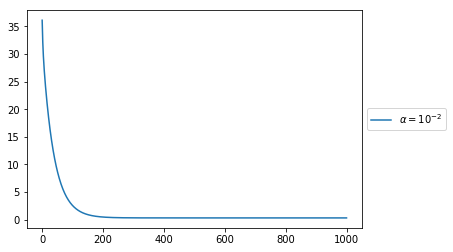

[[6.81472314]
 [0.65280985]]


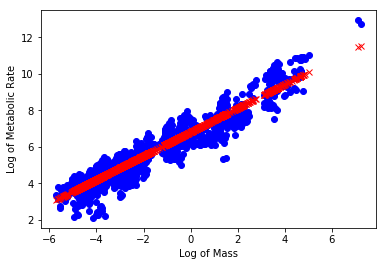

In [93]:
# load in dataset
csvname = datapath + 'kleibers_law_data.csv'
data = np.loadtxt(csvname,delimiter=',')
import matplotlib.pyplot as plt
# get input and output of dataset
x = data[:-1,:]
y = data[-1:,:] 
x_log = np.log(x)
y_log = np.log(y)
g = least_squares; 
w = 0.1*np.random.randn(2,1); max_its = 1000; alpha_choice = 10**(-2);
weight_history, cost_history = gradient_descent(g,alpha_choice,max_its,w)
plot_cost_histories([cost_history],labels = [r'$\alpha = 10^{-2}$'])
yfit = model(x_log, weight_history[-1])
print(weight_history[-1])
plt.figure()
plt.plot(x_log,y_log,'bo')
plt.plot(x_log,yfit,'rx')
plt.xlabel("Log of Mass")
plt.ylabel("Log of Metabolic Rate")
plt.show()



# b) Non-Linear Relationship Between X and Y
        
        ln(y) = w[1]*ln(x) + w[0]
        ln(y)/w[1] = ln(x) + w[0]/w[1]
        e^(ln(y)/w[1]) = e^(ln(x) + w[0]/w[1])
        e^ln(y)^(1/w[1]) = e^ln(x) + 10.436
        y^1.531 = x + 1.101 (approximated upto 3 decimal places)
        
        

 # c) Calories Required for an Animal Weighing 10kg
 
         log(y10kg) = w[0] + w[1]*log(x)
         log(y10kg) = 6.815 + 0.653*2.303
         log(y10kg) = 6.965
         y10kg = 1059.323
         In calories,
             y10kg = 1059.323/4.18
                   = 253.427 cal